# 3. Machine Learning for Classification
We'll use logistic regression to predict churn

## 3.1 Churn prediction project

**Dataset:** https://www.kaggle.com/blastchar/telco-customer-churn

## 3.2 Data preparation

In [1]:
import pandas as pd
import numpy as np
import wget

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
wget.download(data, 'data-week-3.csv')

100% [............................................................................] 977501 / 977501

'data-week-3 (11).csv'

In [4]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T # to be able to see all columns at one

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [7]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [8]:
df.dtypes # take a look to the type of the columns

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [9]:
# totalcharges should be a number, but it is a object == string
df.totalcharges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: totalcharges, Length: 7043, dtype: object

In [10]:
pd.to_numeric(df.totalcharges) # try to convert it to a series of numbers

ValueError: Unable to parse string "_" at position 488

Result means there are values in the column which are not a number. So Pandas should replace the string with NaN, if it is not a number.

In [11]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [12]:
df[tc.isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-lvygi,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,yes,bank_transfer_(automatic),52.55,_,no
753,3115-czmzd,male,0,no,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.25,_,no
936,5709-lvoeq,female,0,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two_year,no,mailed_check,80.85,_,no
1082,4367-nuyao,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.75,_,no
1340,1371-dwpaz,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,credit_card_(automatic),56.05,_,no
3331,7644-omvmy,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.85,_,no
3826,3213-vvolg,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.35,_,no
4380,2520-sgtta,female,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.00,_,no
5218,2923-arzlg,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,mailed_check,19.70,_,no
6670,4075-wkniu,female,0,yes,yes,0,yes,yes,dsl,no,...,yes,yes,yes,no,two_year,no,mailed_check,73.35,_,no


this way is difficult to see the result, so lets try this:

In [13]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


this customer has no number for totalcharges. Let`s replace it with zero

In [14]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0) # replace the NaNs with zero

In [15]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [16]:
df.churn = (df.churn == 'yes').astype(int) # convert 'no' to zero and 'yes' to one

## 3.3 Setting up the validation framework
- Perform the train / validation / test split with Scikit-Learn

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1) 
# split the dataset in 80% full train and 20% test data. After this wee need to split again to get three parts

In [19]:
len(df_full_train), len(df_test)

(5634, 1409)

In [20]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) 

In [21]:
len(df_train), len(df_val), len(df_test) # now the test data are splited in to blocks of 80%, 20% and 20%

(4225, 1409, 1409)

In [22]:
df_train = df_train.reset_index(drop=True) # get a dataset which is sequential and not shuffeled
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [24]:
del df_train['churn'] # remove churn from feature matrix x
del df_val['churn']
del df_test['churn']

## 3.4 EDA
- Check missing values
- Look at the target variable (churn)
- Look at numerical and categorical variables

In [25]:
df_full_train = df_full_train.reset_index(drop=True)

In [26]:
df_full_train.isnull().sum() # there are columns with NaNs?

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [27]:
df_full_train.churn # take a look to our target variable

0       0
1       1
2       0
3       0
4       0
       ..
5629    1
5630    0
5631    1
5632    1
5633    0
Name: churn, Length: 5634, dtype: int64

In [28]:
df_full_train.churn.value_counts() # counts how often every value occurs

churn
0    4113
1    1521
Name: count, dtype: int64

In [29]:
df_full_train.churn.value_counts(normalize = True) # take a look on the distribution of the percentage

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [30]:
# As you can see above we have a churn rate of 26,9 %
global_churn_rate = df_full_train.churn.mean() # the mean delivers also the churn rate in this case
round(global_churn_rate, 2)

np.float64(0.27)

In [31]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [32]:
numerical = ['tenure','monthlycharges','totalcharges']

In [33]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [34]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod'] # categorical values without numerical values, customer id and target value 'churn'

In [35]:
df_full_train[categorical].nunique() # calculate the number of unique values per column

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: Churn rate and risk ratio
Feature importance analysis (part of EDA) - identifying which features affect our target variable
- Churn rate
- Risk ratio
- Mutual information - later

### Churn rate

In [36]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [37]:
df_full_train[df_full_train.gender == 'female'] # select a subset of female customers

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
5,4765-oxppd,female,0,yes,yes,9,yes,no,dsl,yes,...,yes,yes,no,no,month-to-month,no,mailed_check,65.00,663.05,1
9,1732-vhubq,female,1,yes,yes,47,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,no,bank_transfer_(automatic),70.55,3309.25,1
11,7017-vfuly,female,0,yes,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,no,bank_transfer_(automatic),20.10,43.15,0
13,1374-dmzui,female,1,no,no,4,yes,yes,fiber_optic,no,...,no,no,yes,yes,month-to-month,yes,electronic_check,94.30,424.45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,8065-ykxkd,female,0,no,no,10,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.75,799.65,1
5619,5627-tvbpp,female,0,no,yes,35,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,credit_card_(automatic),20.10,644.50,0
5626,3262-eidhv,female,0,yes,yes,72,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,no,credit_card_(automatic),84.70,5893.90,0
5627,7446-sfaoa,female,0,yes,no,37,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,bank_transfer_(automatic),19.85,717.50,0


In [38]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean() # churn rate for female customers
churn_female

np.float64(0.27682403433476394)

In [39]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean() # churn rate for male customers
churn_male

np.float64(0.2632135306553911)

In [40]:
# now we have a churn rate within each group
global_churn = df_full_train.churn.mean() # gloabal churn rate
global_churn

np.float64(0.26996805111821087)

In [41]:
# do the same for customers with or without partners
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [42]:
# 2932 customers have no partner and 2702 customers hase an partner
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean() # churn rate for customers which have an partner
churn_partner

np.float64(0.20503330866025166)

In [43]:
global_churn - churn_partner

np.float64(0.06493474245795922)

In [44]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean() # churn rate for customers which has not an partner
churn_no_partner

np.float64(0.3298090040927694)

In [45]:
global_churn - churn_no_partner

np.float64(-0.05984095297455855)

The difference between the global churn rate and the partner churn rate is big. Could be an hint, that the partner variable is important for the churn rate.

### Risk ratio

In [46]:
churn_no_partner / global_churn

np.float64(1.2216593879412643)

In [47]:
churn_partner / global_churn

np.float64(0.7594724924338315)

```SQL
SELECT
    gender,
    AVG(churn),
    AVG(churn) - global_churn AS diff,
    AVG(churn) / global_churn AS risk
FROM
    data
GROUP BY
    gender;
```

In [48]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [49]:
from IPython.display import display

In [50]:
for c in categorical:
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


## 3.6 Feature importance: Mutual information
Mutual information - concept from information theory, it tells us how much we can learn about one variable if we know the value of another.

In [51]:
from sklearn.metrics import mutual_info_score

In [52]:
mutual_info_score(df_full_train.churn, df_full_train.contract) # Do we learn a lot about churn when we look at the 'contract' feature?

np.float64(0.0983203874041556)

In [53]:
mutual_info_score(df_full_train.gender, df_full_train.churn)
# We learn about 'churn' when looking at 'gender', less so than when looking at 'contract'

np.float64(0.0001174846211139946)

In [54]:
mutual_info_score(df_full_train.contract, df_full_train.churn)

np.float64(0.0983203874041556)

In [55]:
mutual_info_score(df_full_train.partner, df_full_train.churn)

np.float64(0.009967689095399745)

In [56]:
# calculate the mutual information for 'series' in context of 'churn'
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [57]:
mi = df_full_train[categorical].apply(mutual_info_churn_score) # calculate the mutual information for all categorical features
mi.sort_values(ascending = False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7
How about numerical columns?

In [58]:
df_full_train.tenure.max()

np.int64(72)

In [59]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [60]:
df_full_train[df_full_train.tenure <= 2].churn.mean()

np.float64(0.5953420669577875)

In [61]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

np.float64(0.3994413407821229)

In [62]:
df_full_train[df_full_train.tenure > 12].churn.mean()

np.float64(0.17634908339788277)

In [63]:
df_full_train[df_full_train.monthlycharges <= 20].churn.mean()

np.float64(0.08795411089866156)

In [64]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)].churn.mean()

np.float64(0.18340943683409436)

In [65]:
df_full_train[df_full_train.monthlycharges > 50].churn.mean()

np.float64(0.32499341585462205)

## 3.8 One-hot encoding
- Use Sciki-Learn to encode categorical features

In [66]:
from sklearn.feature_extraction import DictVectorizer

In [67]:
dv = DictVectorizer(sparse=False) # converts the dictonary into an vector

train_dict = df_train[categorical + numerical].to_dict(orient='records') # convert the data frame row wise to an dictonary
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

## 3.9 Logistic regression
- Binary classification
- Linear vs logistic regression

In [68]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [69]:
z = np.linspace(-7, 7, 51) # creates 51 numbers between -5 and 5
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

In [70]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

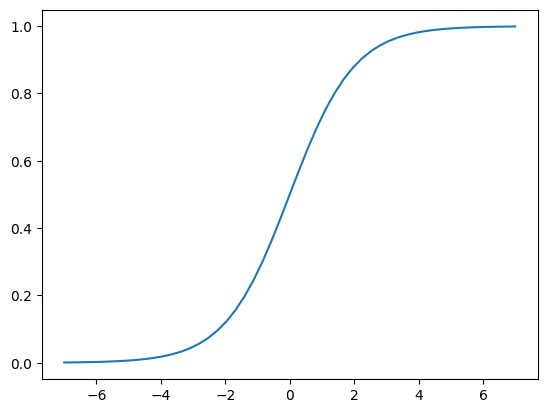

In [71]:
plt.plot(z, sigmoid(z))

In [72]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [73]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

## 3.10 Training logistic regression with Scikit-Learn
- Train a model with Scikit-Learn
- Apply it to the validation dataset
- Calculate the accuracy

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model = LogisticRegression(max_iter=2100)
model.fit(X_train, y_train) # training the model

LogisticRegression(max_iter=2100)

In [76]:
model.intercept_[0] # it is the bias, bias and intercept are synoyms

np.float64(-0.04535394458009966)

In [77]:
model.coef_[0].round(3) # that are the wights

array([ 0.683,  0.037, -0.679,  0.056, -0.014,  0.114, -0.16 ,  0.088,
        0.04 ,  0.002, -0.497,  0.699, -0.16 , -0.018, -0.187,  0.066,
        0.163,  0.118, -0.16 ,  0.085,  0.286, -0.16 , -0.083, -0.161,
        0.203, -0.042,  0.084, -0.052, -0.003,  0.109, -0.012,  0.066,
       -0.024,  0.192, -0.093, -0.16 ,  0.296, -0.054, -0.16 ,  0.256,
        0.236, -0.16 , -0.033, -0.069,  0.   ])

In [78]:
model.predict(X_train) # Hard Prediction, has no information about the probability

array([0, 1, 1, ..., 1, 0, 1])

In [79]:
model.predict_proba(X_train) # Prediction, with probability, so called soft prediction

array([[0.92687549, 0.07312451],
       [0.32395876, 0.67604124],
       [0.36869274, 0.63130726],
       ...,
       [0.48900359, 0.51099641],
       [0.97445801, 0.02554199],
       [0.30637357, 0.69362643]])

In [80]:
y_pred = model.predict_proba(X_train)[:, 1] # take just the right columns with the probality for the positiv case
y_pred

array([0.07312451, 0.67604124, 0.63130726, ..., 0.51099641, 0.02554199,
       0.69362643])

In [81]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00665474, 0.20473376, 0.21748429, ..., 0.15187937, 0.78891905,
       0.81143374])

In [82]:
churn_decision = (y_pred >= 0.5)

In [83]:
df_val[churn_decision].customerid # list of customers who wants to churn

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 316, dtype: object

**Check how good our predictions are, against the validation data**

In [84]:
y_val

array([0, 0, 0, ..., 0, 1, 1])

In [85]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [86]:
(y_val == churn_decision).mean() # calculates the mean for the differences between the validation data and the predictions

np.float64(0.8026969481902059)

**80 % of our predictions are correct**

In [87]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred # probability to churn
df_pred['prediction'] = churn_decision.astype(int) # prediction to churn
df_pred['actual'] = y_val # data from validation set, so the real churn values

In [88]:
df_pred

,probability,prediction,actual
0,0.006655,0,0
1,0.204734,0,0
2,0.217484,0,0
3,0.564407,1,1
4,0.218511,0,0
...,...,...,...
1404,0.291154,0,0
1405,0.041338,0,1
1406,0.151879,0,0
1407,0.788919,1,1


In [89]:
df_pred['correct'] = df_pred.prediction == df_pred.actual # take a look which predictions are correct
df_pred

,probability,prediction,actual,correct
0,0.006655,0,0,True
1,0.204734,0,0,True
2,0.217484,0,0,True
3,0.564407,1,1,True
4,0.218511,0,0,True
...,...,...,...,...
1404,0.291154,0,0,True
1405,0.041338,0,1,False
1406,0.151879,0,0,True
1407,0.788919,1,1,True


In [90]:
df_pred.correct.mean()

np.float64(0.8026969481902059)

## 3.11 Model interpretation
- Look at the coefficients (weights)
- Train a smaller model with fewer features

In [91]:
dv.get_feature_names_out() # names of the features retrieved from the dictionary

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

### Excurs what does the function zip?

In [92]:
a = [1, 2, 3, 4]
b = 'abcd'

In [93]:
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

Combines the elements of lists to a list of pairs. We can also use it to combine it to an dictionary. In that case all elements of list a becomes the keys of the dictionary and the elements of list b becomes the values.

In [94]:
dict(zip(a,b))

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

### Convert the relation of feature names and weights / Coefficients to an dictionary

In [95]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': np.float64(0.683),
 'contract=one_year': np.float64(0.037),
 'contract=two_year': np.float64(-0.679),
 'dependents=no': np.float64(0.056),
 'dependents=yes': np.float64(-0.014),
 'deviceprotection=no': np.float64(0.114),
 'deviceprotection=no_internet_service': np.float64(-0.16),
 'deviceprotection=yes': np.float64(0.088),
 'gender=female': np.float64(0.04),
 'gender=male': np.float64(0.002),
 'internetservice=dsl': np.float64(-0.497),
 'internetservice=fiber_optic': np.float64(0.699),
 'internetservice=no': np.float64(-0.16),
 'monthlycharges': np.float64(-0.018),
 'multiplelines=no': np.float64(-0.187),
 'multiplelines=no_phone_service': np.float64(0.066),
 'multiplelines=yes': np.float64(0.163),
 'onlinebackup=no': np.float64(0.118),
 'onlinebackup=no_internet_service': np.float64(-0.16),
 'onlinebackup=yes': np.float64(0.085),
 'onlinesecurity=no': np.float64(0.286),
 'onlinesecurity=no_internet_service': np.float64(-0.16),
 'onlinesecurity=yes': np.floa

In [96]:
small = ['contract', 'tenure', 'monthlycharges']

In [97]:
df_train[small].iloc[:10].to_dict(orient='records') # take the first 10, convert it to an dictionary, on entry per row

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [98]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [99]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [100]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [101]:
X_train_small = dv_small.transform(dicts_train_small)

In [102]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [103]:
w0 = model_small.intercept_[0] # bias, we assume about the customer, if we know nothing about him.
w0

np.float64(-2.4779575953822954)

In [104]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [105]:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': np.float64(0.971),
 'contract=one_year': np.float64(-0.024),
 'contract=two_year': np.float64(-0.948),
 'monthlycharges': np.float64(0.027),
 'tenure': np.float64(-0.036)}

In [106]:
sigmoid(w0) # project w0 into a range between 0 and 1

np.float64(0.07741795384361162)

In [107]:
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036) # the score

-0.3300000000000001

In [108]:
sigmoid(_) # the probability of the score calculated one line above that the customer churn
# underscore means take the output of the previous cell what ever it was

np.float64(0.41824062315816374)

The probability of churning of that customer is 41%

In [109]:
-2.47 + 0.97 + 60 * 0.027 + 1 * (-0.036) # the score for 1 month contract with 60 $

0.08399999999999966

In [110]:
sigmoid(_)

np.float64(0.5209876607065322)

In [111]:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036) # the score for two year contract with 30 $ per month

-3.473

In [112]:
sigmoid(_)

np.float64(0.030090303318277657)

## 3.12 Using the model

In [113]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dicts_full_train[:3] # take a look to the first three

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [114]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [115]:
y_full_train = df_full_train.churn.values

In [116]:
model = LogisticRegression(max_iter=2100)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=2100)

In [117]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')

In [118]:
X_test = dv.transform(dicts_test)

In [119]:
model.predict_proba(X_test)

array([[0.93235802, 0.06764198],
       [0.90157563, 0.09842437],
       [0.66515533, 0.33484467],
       ...,
       [0.99490258, 0.00509742],
       [0.79540947, 0.20459053],
       [0.36231488, 0.63768512]])

In [120]:
model.predict_proba(X_test)[:, 1]

array([0.06764198, 0.09842437, 0.33484467, ..., 0.00509742, 0.20459053,
       0.63768512])

In [121]:
y_pred = model.predict_proba(X_test)[:, 1]

In [122]:
churn_decistion = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [123]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [124]:
(churn_decision == y_test).mean()

np.float64(0.64513839602555)

In [137]:
customer = dicts_test[-1] # -1 means select the alst one
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [138]:
X_small = dv.transform([customer])

In [139]:
model.predict_proba(X_small)[0,1] #probability of chearning

np.float64(0.637685124878236)

In [141]:
y_test[-1]

np.int64(1)

Resalt means the customer will churn